![OpenDreamKit logo and EU Flag](header.png)

Review meeting 26 April 2017, Brussels

# Micromagnetic model in Notebook

### Mesh

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline
system = oc.System(name="system")

L = 30e-9   # size of simulation cube
d = 5e-9   # discretisation cell size 
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d), name="mesh")

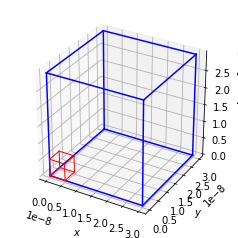

In [2]:
mesh

### LaTeX representation of equations: Hamiltonian and equation of motion

Physical system contains Hamiltonian, dynamics equation and magnetisation vector field:


In [3]:
exchange = oc.Exchange(A=1e-12)

In [4]:
exchange

Exchange(A=1e-12)

In [5]:
system.hamiltonian = exchange + oc.Zeeman(H=(0, 0, 1e6))

In [6]:
system.hamiltonian

Exchange(A=1e-12) + Zeeman(H=(0, 0, 1000000.0))

### Dynamics

In [7]:
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=0.15)

In [8]:
system.dynamics

Precession(gamma=221100.0) + Damping(alpha=0.15)

### Analysing time-dependent data

In [9]:
td = oc.TimeDriver() 
system.m = df.Field(mesh, value=(1, 0, 0), norm=8.6e5)
td.drive(system, t=2e-10, n=200)    # compute some data

2017/4/25 17:8: Calling OOMMF (system/system.mif) ... [2.0s]


In [10]:
system.dt.head()

,E,Ecount,max_dm/dt,dE/dt,deltaE,Eex,max_spin_angle,stage_max_spin_angle,run_max_spin_angle,FixedZeeman:zeeman:Energy,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-9.460988e-19,37.0,12521.354420,-9.454356e-07,-7.013747e-19,0.0,0.0,0.0,0.0,-9.460988e-19,6.0,6.0,0.0,0.976199,0.214441,0.032424,7.414180e-13,1.000000e-12
1,-1.890210e-18,44.0,12501.627780,-9.424590e-07,-9.441116e-19,0.0,0.0,0.0,0.0,-1.890210e-18,8.0,1.0,1.0,0.906027,0.418234,0.064780,1.000000e-12,2.000000e-12
2,-2.830364e-18,51.0,12468.864908,-9.375257e-07,-9.401538e-19,0.0,0.0,0.0,0.0,-2.830364e-18,10.0,1.0,2.0,0.793110,0.601305,0.097000,1.000000e-12,3.000000e-12
3,-3.764623e-18,58.0,12423.236557,-9.306767e-07,-9.342586e-19,0.0,0.0,0.0,0.0,-3.764623e-18,12.0,1.0,3.0,0.643265,0.754695,0.129018,1.000000e-12,4.000000e-12
4,-4.691098e-18,65.0,12364.978744,-9.219685e-07,-9.264747e-19,0.0,0.0,0.0,0.0,-4.691098e-18,14.0,1.0,4.0,0.464175,0.871031,0.160769,1.000000e-12,5.000000e-12


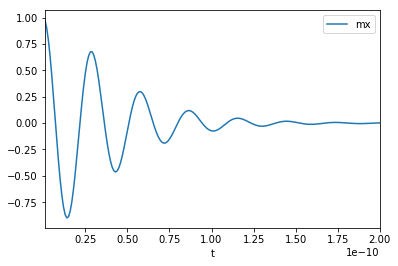

In [11]:
system.dt.plot("t", "mx");

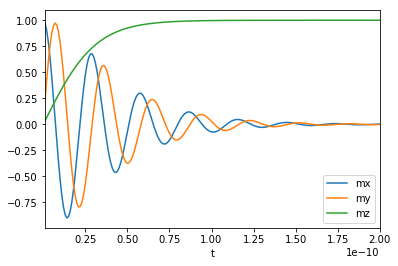

In [12]:
system.dt.plot("t", ["mx", "my", "mz"]);